In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from sklearn import datasets
from sklearn.cluster import KMeans

In [0]:
df = pd.read_csv ('/content/drive/My Drive/Colab Notebooks/data/game_tag.csv', encoding = 'utf-8', header = 0)
game_list = pd.read_csv ('/content/drive/My Drive/Colab Notebooks/data/game_list.csv', encoding = 'utf-8', header = 0)

In [0]:
game_list

,game_id,game_title,review_count
0,216938,Pieterw test app76 ( 216938 ),-1
1,660010,test2,-1
2,660130,test3,-1
3,496070,Geo-Fall,0
4,496090,"Space, VR! Demo",0
...,...,...,...
86766,1179010,Rollers,0
86767,699680,Monopolka,17
86768,1050560,TAG WAR VR,1
86769,1145520,Wall Force,0


In [0]:
game_list_valid = game_list[game_list['review_count'] >= 500]

In [0]:
game_list_valid.sort_values(by='review_count', ascending=True, inplace=True)
game_list_valid.set_index('game_id', inplace=True, drop=True)
game_list_valid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,game_title,review_count
game_id,,
943740,Rocket League® - McLaren 570S Car Pack,500
402880,Age of Barbarian Extended Cut,500
842100,Daymare: 1998,500
871930,Gladiabots,500
400180,Okhlos: Omega,501
...,...,...
4000,Garry's Mod,368868
359550,Tom Clancy's Rainbow Six Siege,373589
271590,Grand Theft Auto V,528396


In [0]:
game_list_valid.to_csv("/content/drive/My Drive/Colab Notebooks/data/game_list_valid.csv", encoding = 'utf-8', index = True)

In [0]:
df = df[df['game_id'].isin(game_list['game_id'])]
df

,game_id,tag
0,4000,Sandbox
1,4000,Multiplayer
2,4000,Funny
3,4000,Moddable
4,4000,Building
...,...,...
57576,252690,Tabletop
57577,252690,Game Development
57578,252690,Party-Based RPG
57579,252690,Multiplayer


In [0]:
df['tmp'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df

,game_id,tag,tmp
0,4000,Sandbox,1
1,4000,Multiplayer,1
2,4000,Funny,1
3,4000,Moddable,1
4,4000,Building,1
...,...,...,...
57576,252690,Tabletop,1
57577,252690,Game Development,1
57578,252690,Party-Based RPG,1
57579,252690,Multiplayer,1


In [0]:
df = df.pivot_table (index = 'game_id', columns = 'tag', values = 'tmp', aggfunc = np.mean)
df = df.fillna(0)
df

tag,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,3D,3D Fighter,3D Platformer,3D Vision,4 Player Local,4X,6DOF,ATV,Abstract,Action,Action RPG,Action-Adventure,Addictive,Adventure,Agriculture,Aliens,Alternate History,America,Animation & Modeling,Anime,Arcade,Archery,Arena Shooter,Artificial Intelligence,Assassin,Asymmetric VR,Asynchronous Multiplayer,Atmospheric,Audio Production,Automation,Automobile Sim,BMX,Base Building,Baseball,...,TrackIR,Trading,Trading Card Game,Trains,Transhumanism,Transportation,Trivia,Turn-Based,Turn-Based Combat,Turn-Based Strategy,Turn-Based Tactics,Tutorial,Twin Stick Shooter,Typing,Underground,Underwater,Unforgiving,Utilities,VR,Vampire,Vehicular Combat,Video Production,Villain Protagonist,Violent,Visual Novel,Voice Control,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1148650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
transformer = TfidfTransformer() # tfidf 변환 인스턴스 생성
tfidf = transformer.fit_transform(df).toarray()
print(tfidf)

[[0.32989843 0.26778949 0.         ... 0.         0.         0.31363462]
 [0.         0.28403025 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [0]:
my_df = pd.DataFrame (tfidf*100, index = df.index, columns = df.columns)
my_df

tag,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,3D,3D Fighter,3D Platformer,3D Vision,4 Player Local,4X,6DOF,ATV,Abstract,Action,Action RPG,Action-Adventure,Addictive,Adventure,Agriculture,Aliens,Alternate History,America,Animation & Modeling,Anime,Arcade,Archery,Arena Shooter,Artificial Intelligence,Assassin,Asymmetric VR,Asynchronous Multiplayer,Atmospheric,Audio Production,Automation,Automobile Sim,BMX,Base Building,Baseball,...,TrackIR,Trading,Trading Card Game,Trains,Transhumanism,Transportation,Trivia,Turn-Based,Turn-Based Combat,Turn-Based Strategy,Turn-Based Tactics,Tutorial,Twin Stick Shooter,Typing,Underground,Underwater,Unforgiving,Utilities,VR,Vampire,Vehicular Combat,Video Production,Villain Protagonist,Violent,Visual Novel,Voice Control,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,32.989843,26.778949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.164392,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,30.628219,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,31.363462
20,0.000000,28.403025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.659542,0.0,0.0,0.0,9.411704,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.262053,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
30,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.853106,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,22.829619,0.0,0.0,0.0,0.0,0.0,0.0,39.798979,27.807737,0.0,0.0,0.000000
40,0.000000,34.524396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.525832,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,38.972314,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
50,0.000000,33.682427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.269131,0.0,0.0,0.0,11.161101,0.0,33.012679,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,14.490649,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147510,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,9.345004,0.0,0.000000,0.0,0.0,0.0,17.874322,20.98962,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,23.752993,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
1148650,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,13.960831,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,

1 :  30548757.99846102 



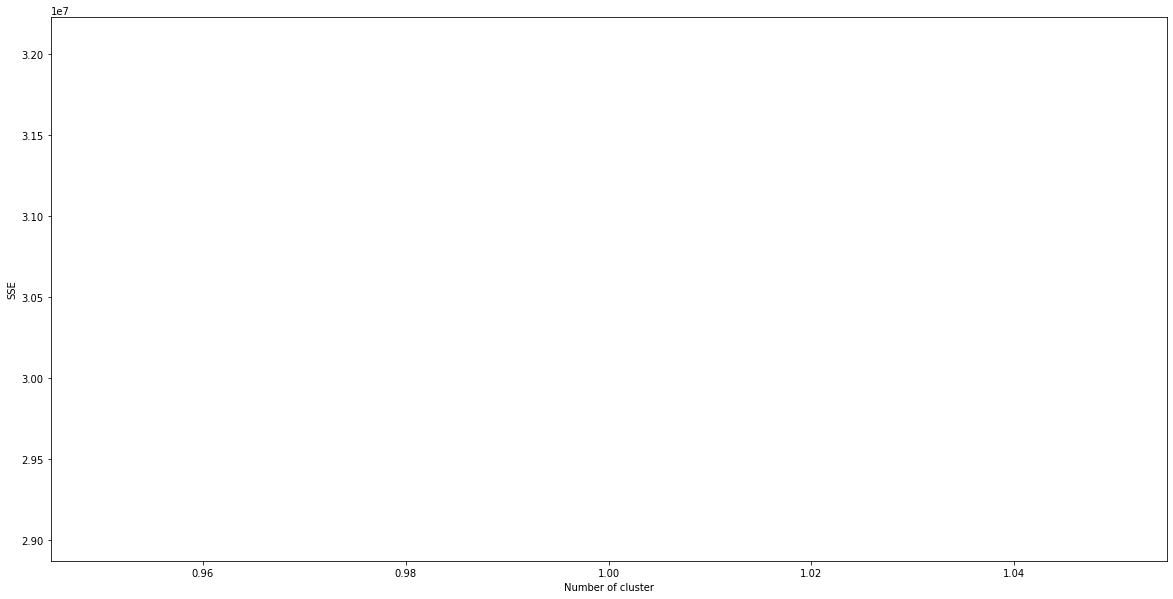

2 :  29707557.618504737 



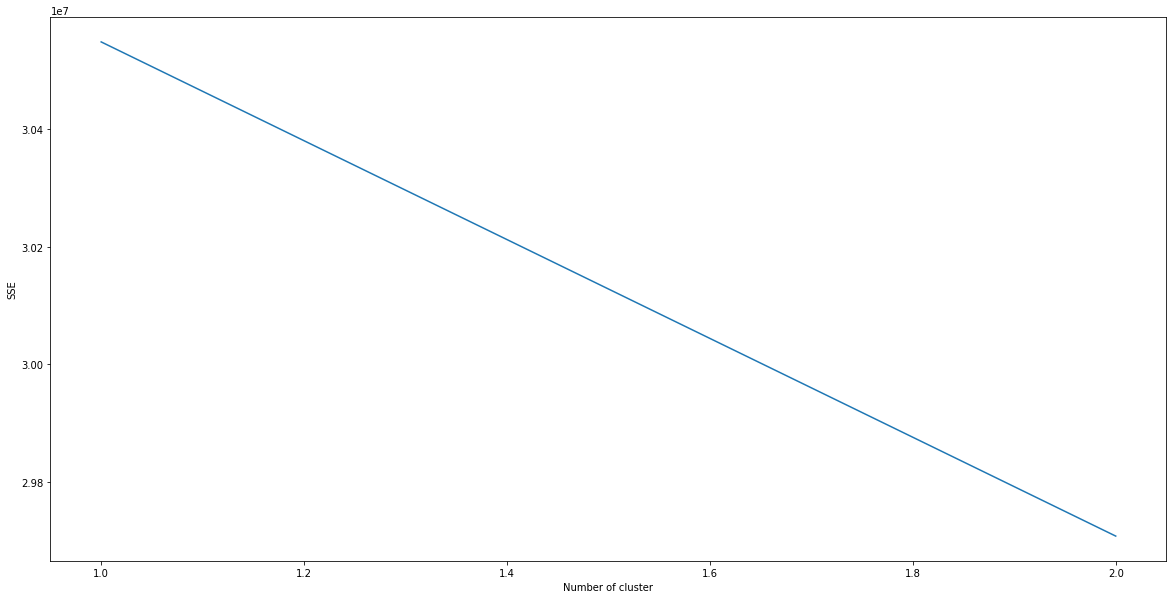

3 :  29060946.560021497 



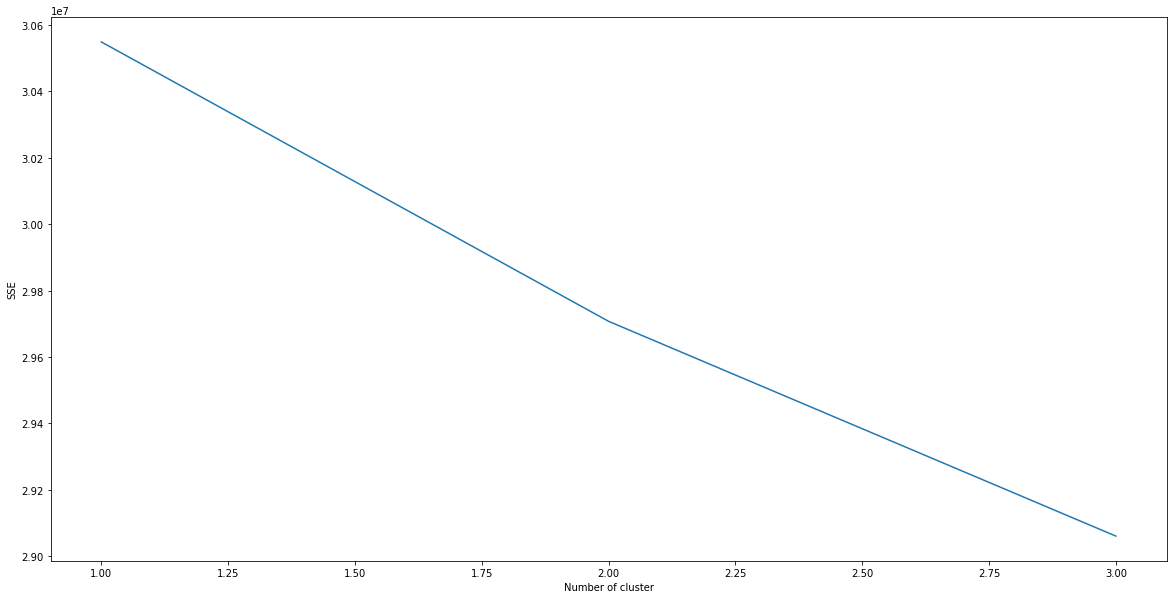

4 :  28572521.96192939 



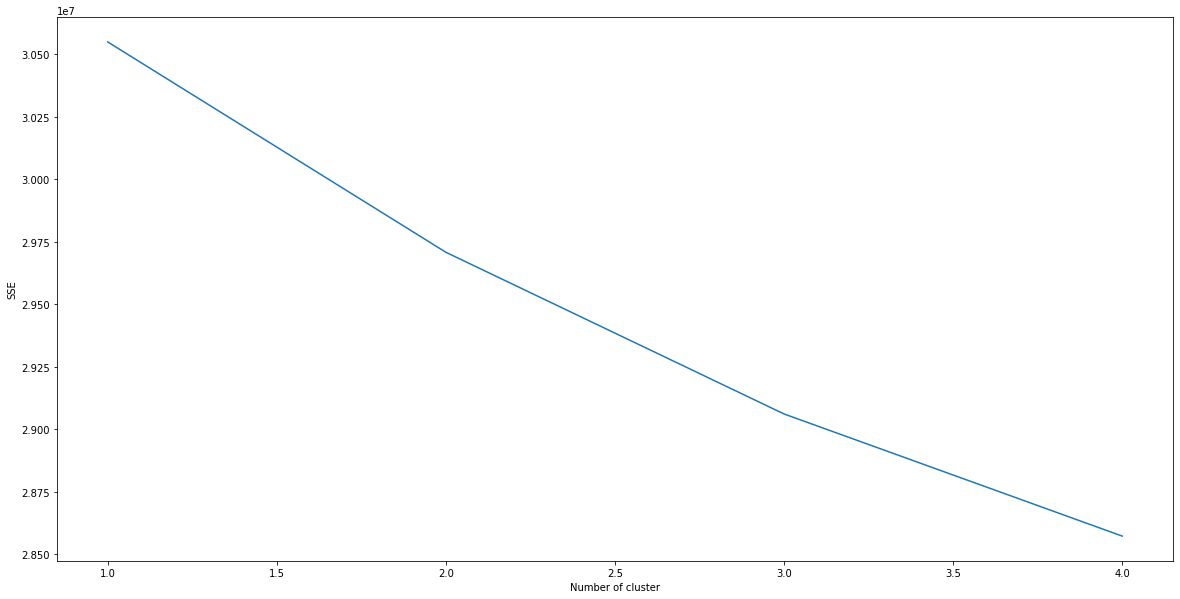

5 :  28134044.70254937 



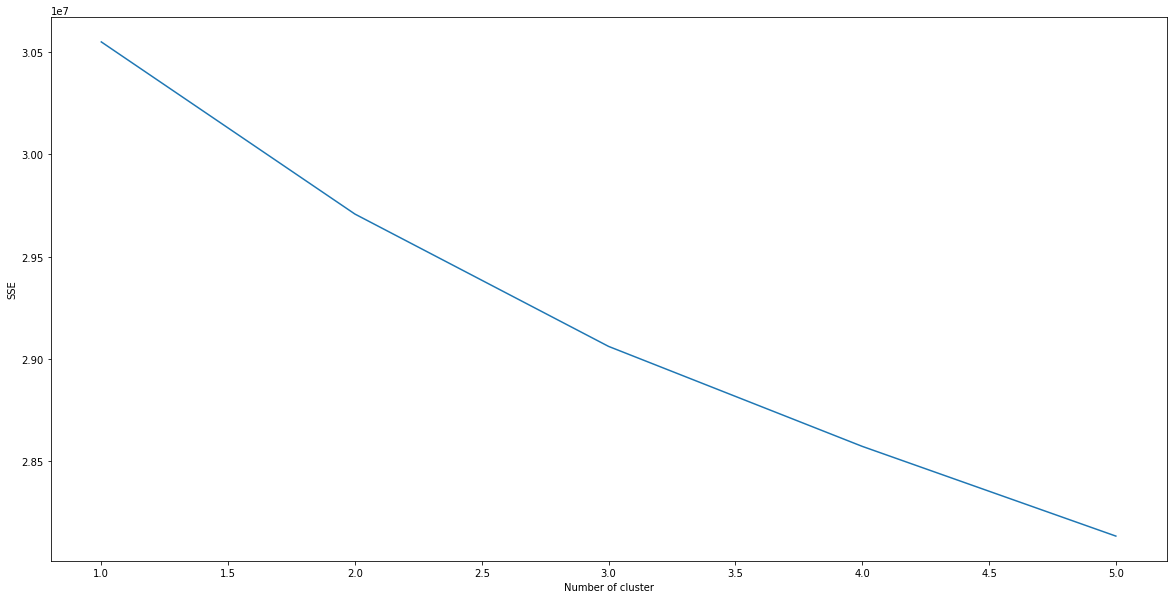

6 :  27701554.67689265 



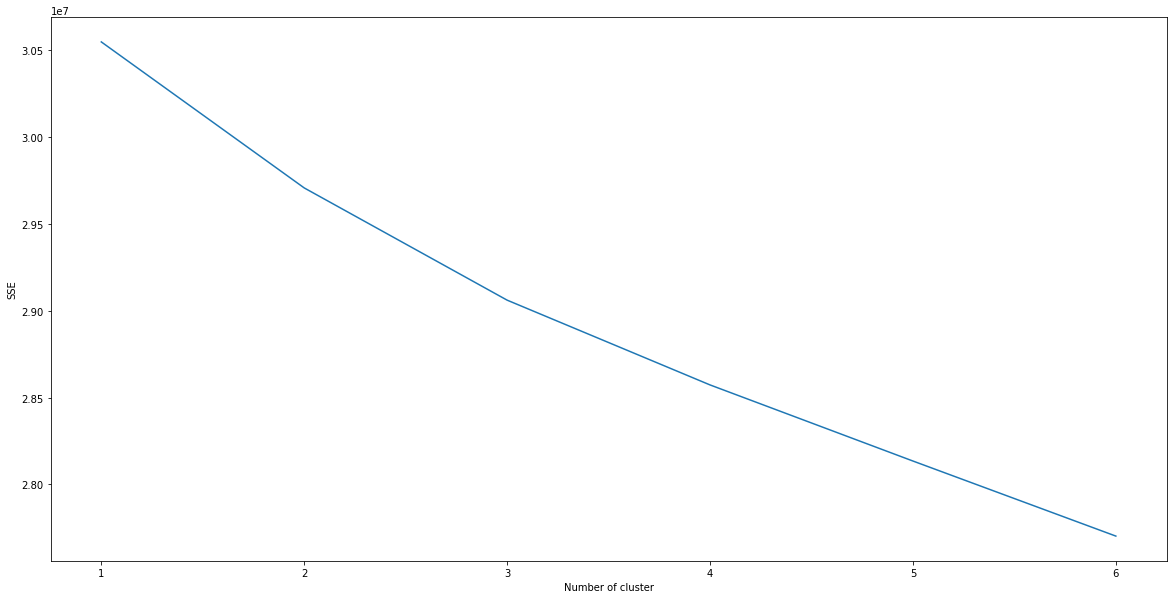

7 :  27321177.110968247 



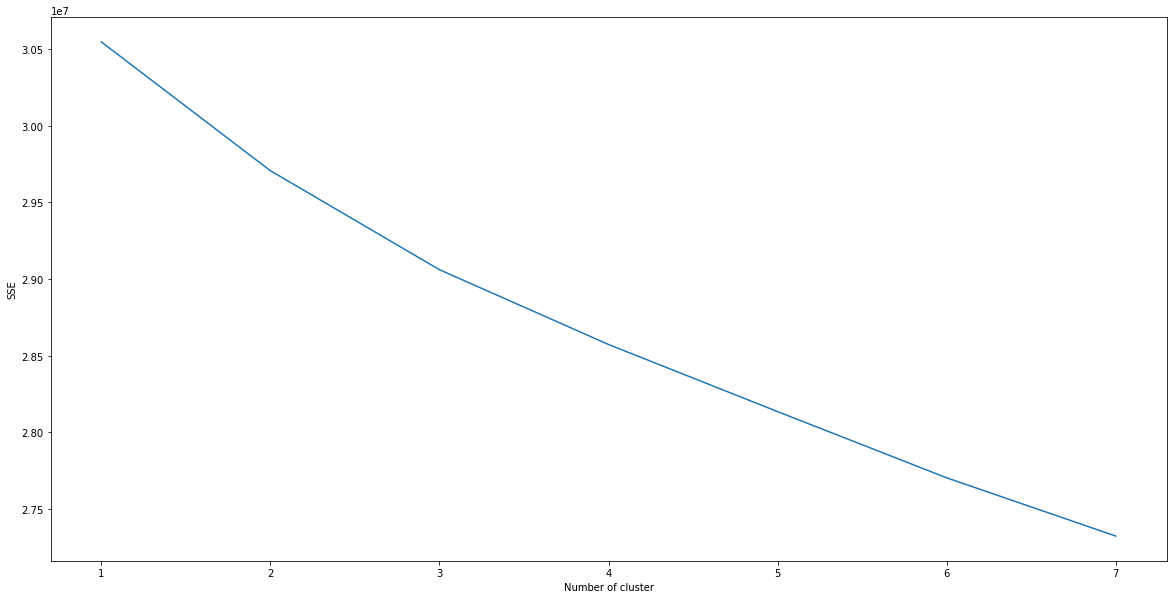

8 :  27008868.992043816 



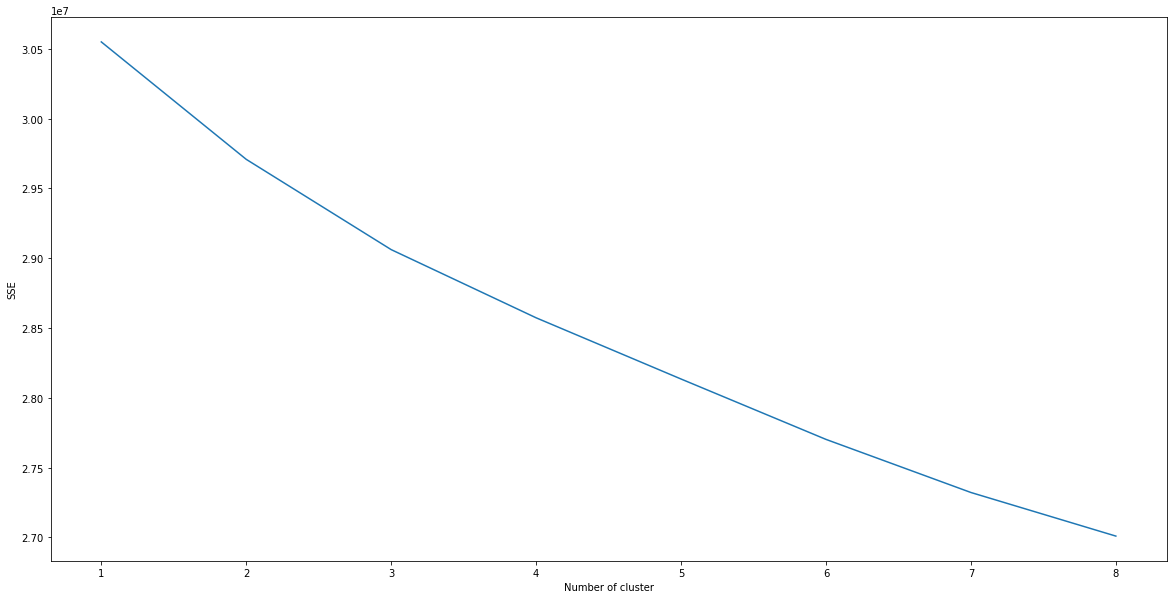

9 :  26700071.39661142 



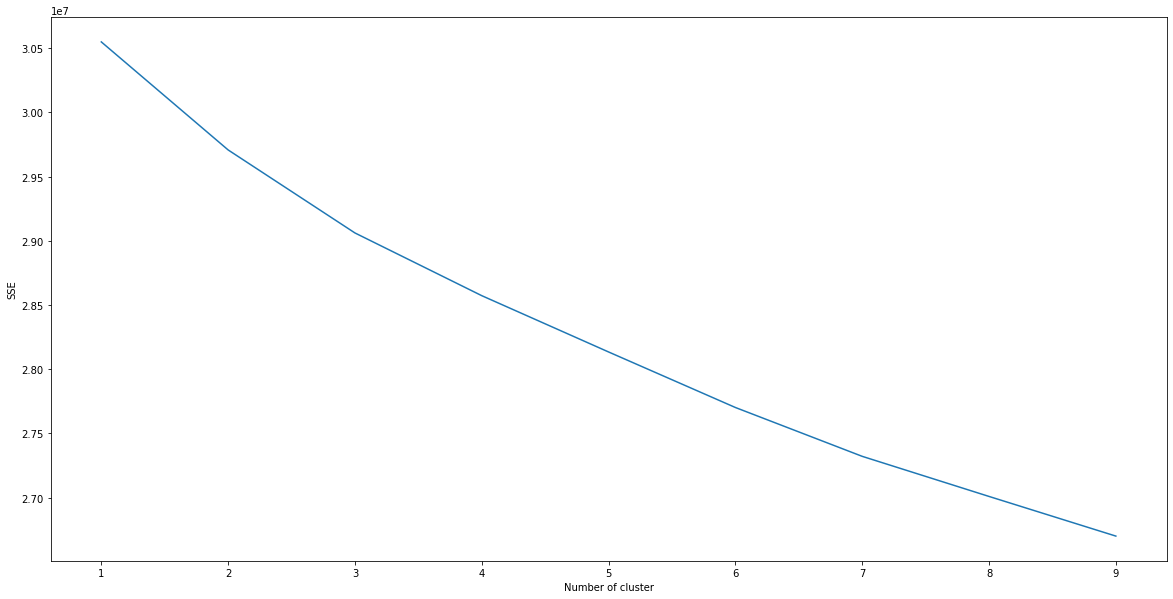

10 :  26440525.737416115 



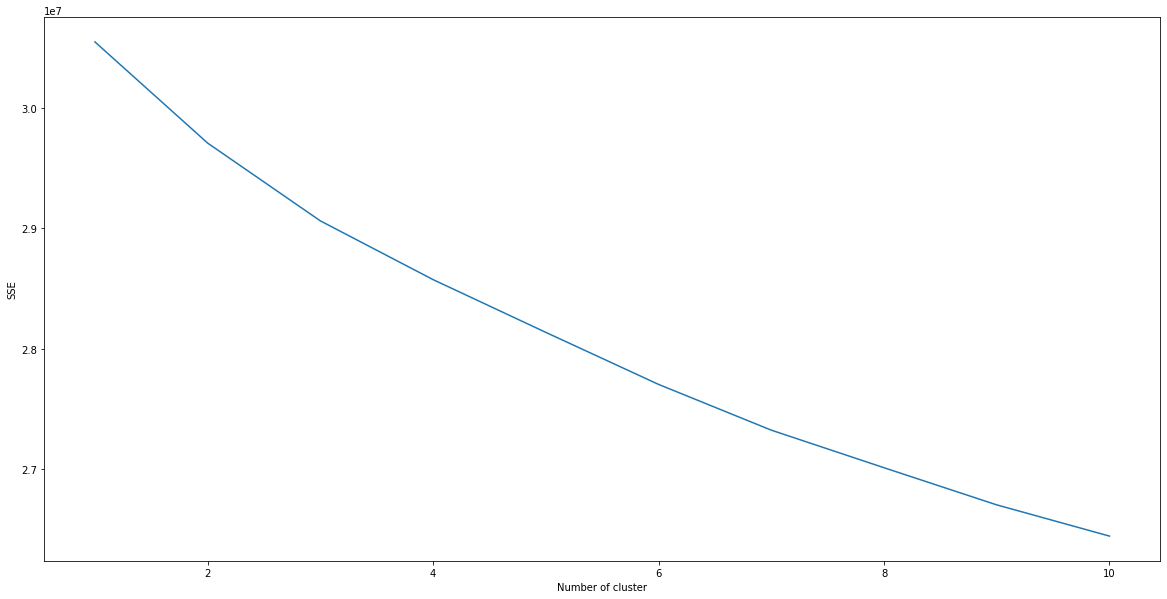

11 :  26189147.59526452 



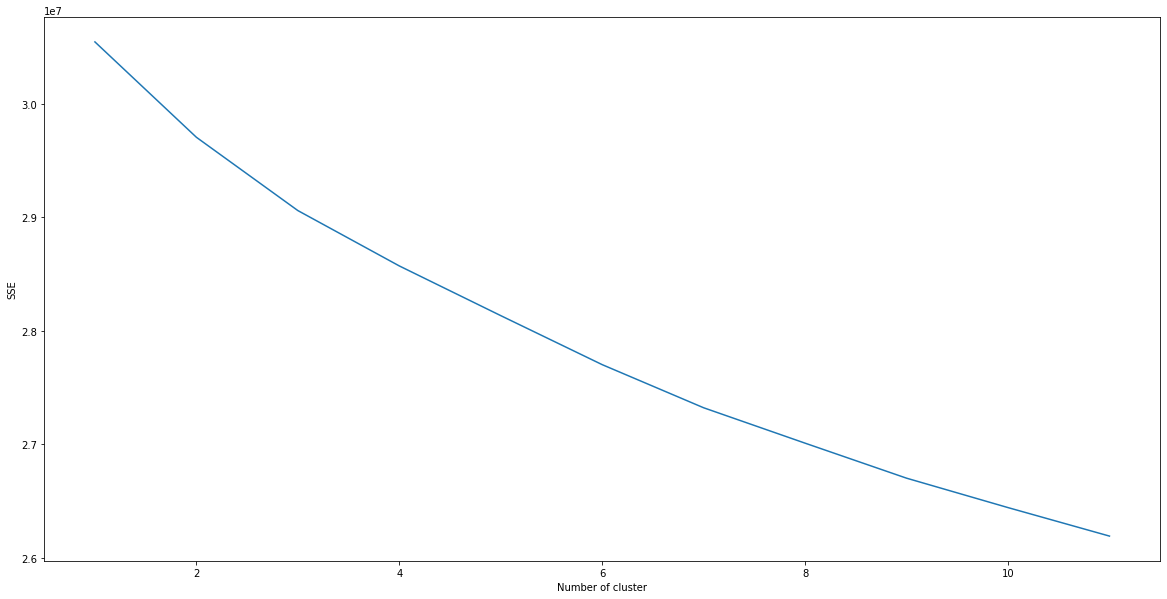

12 :  25978436.333927568 



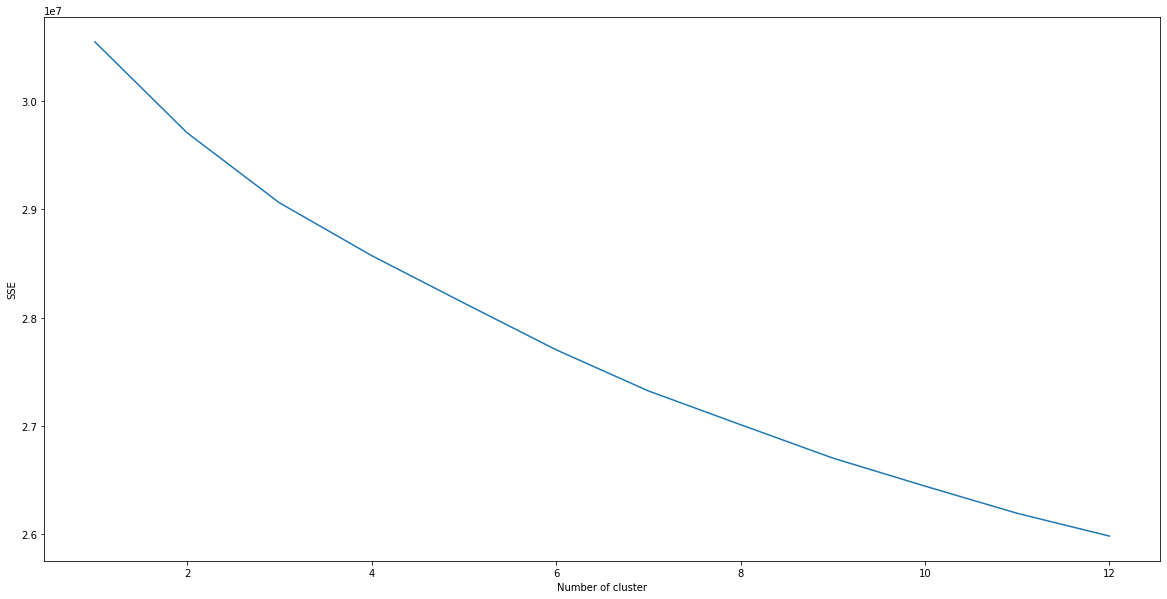

13 :  25801735.182043485 



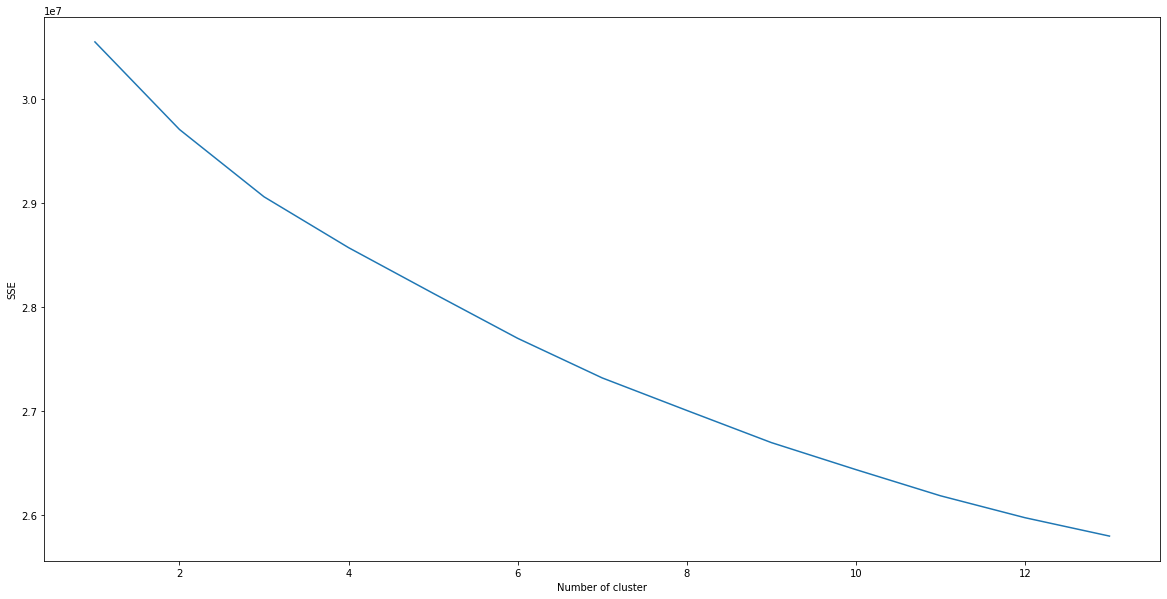

14 :  25557272.237249628 



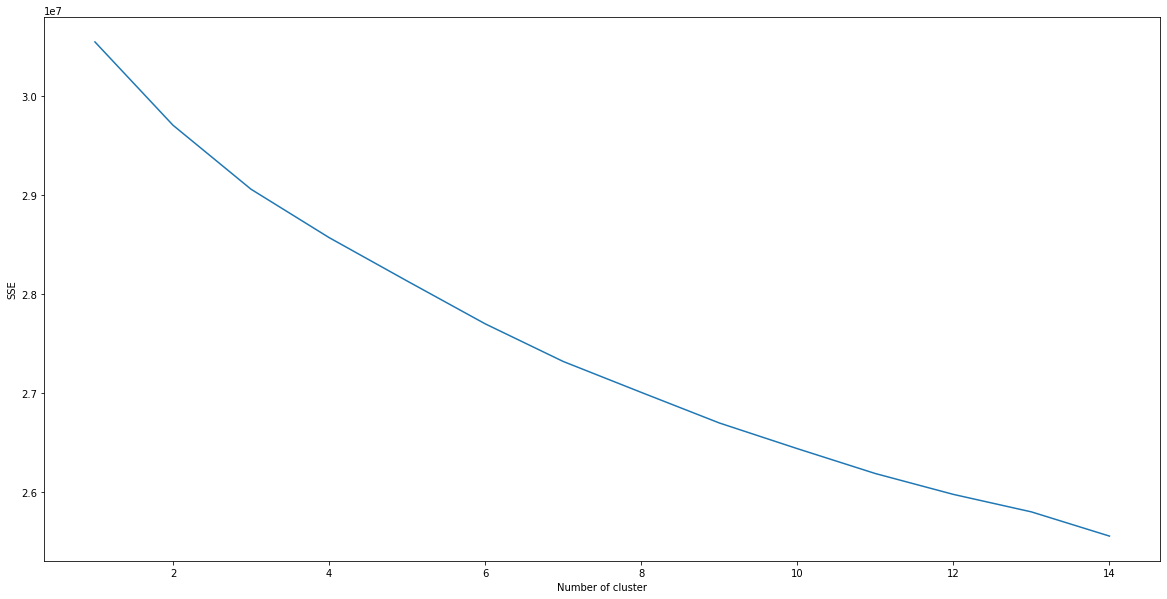

15 :  25360457.290700175 



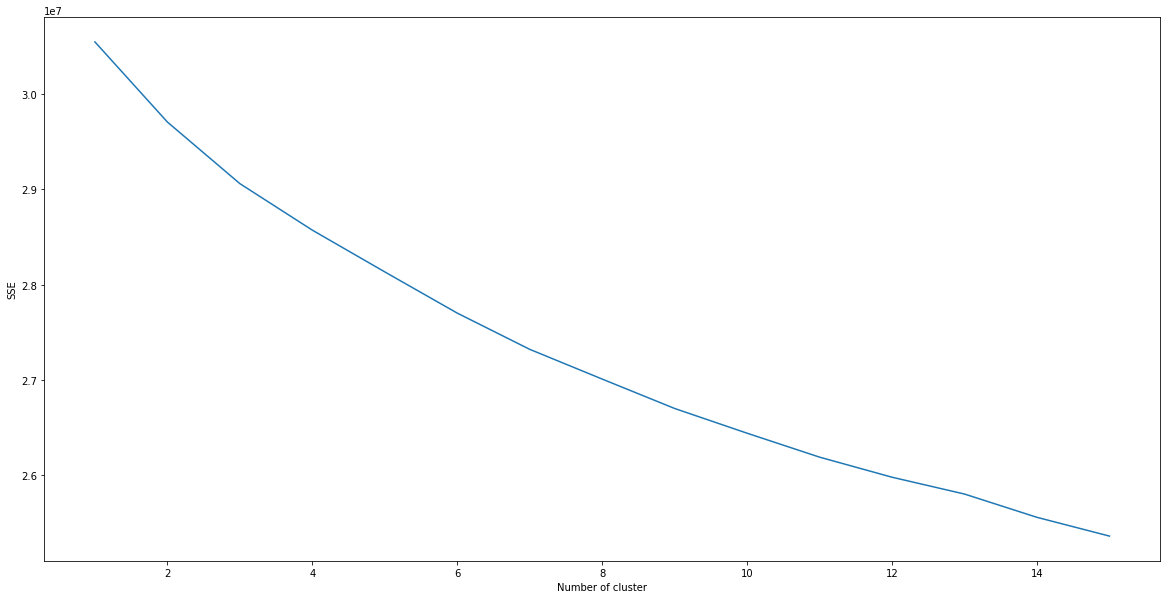

16 :  25216938.293617055 



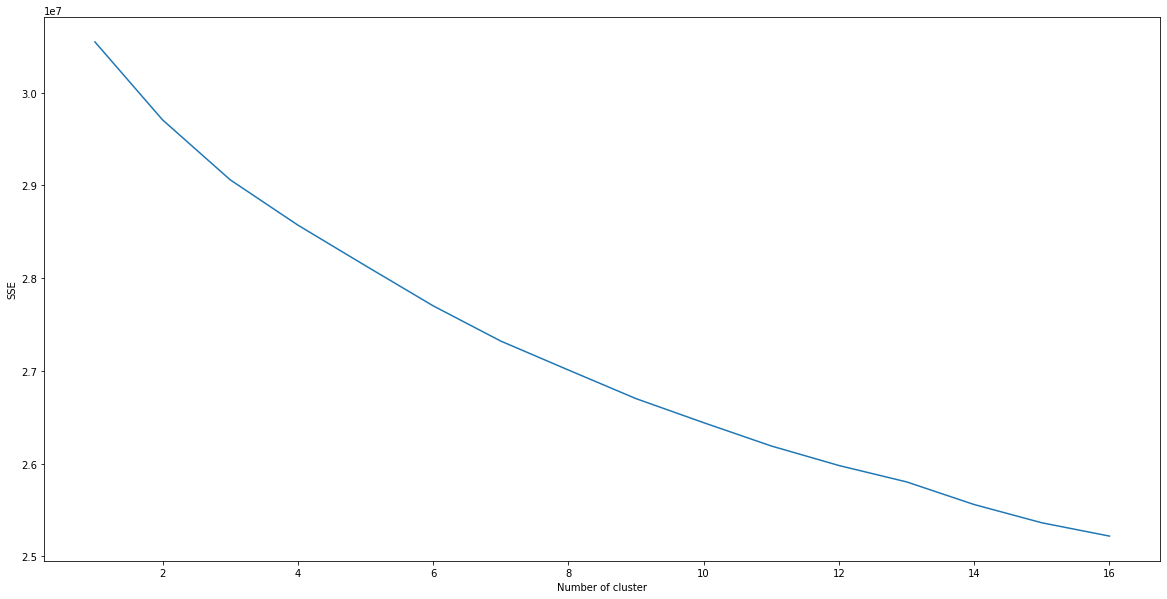

17 :  25042105.752958898 



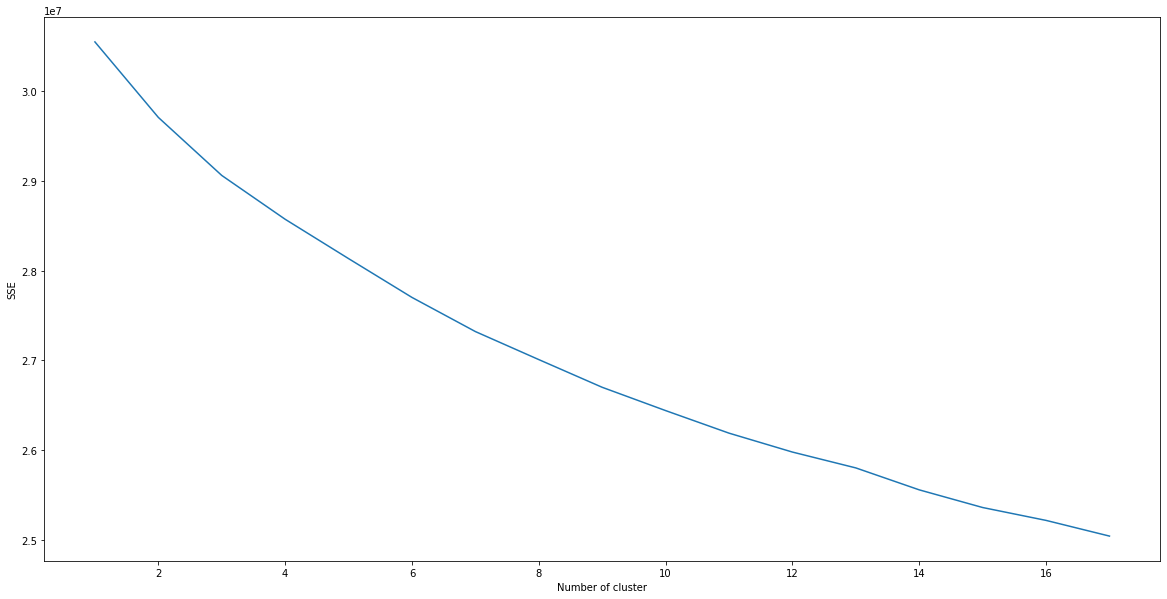

18 :  24870995.26096602 



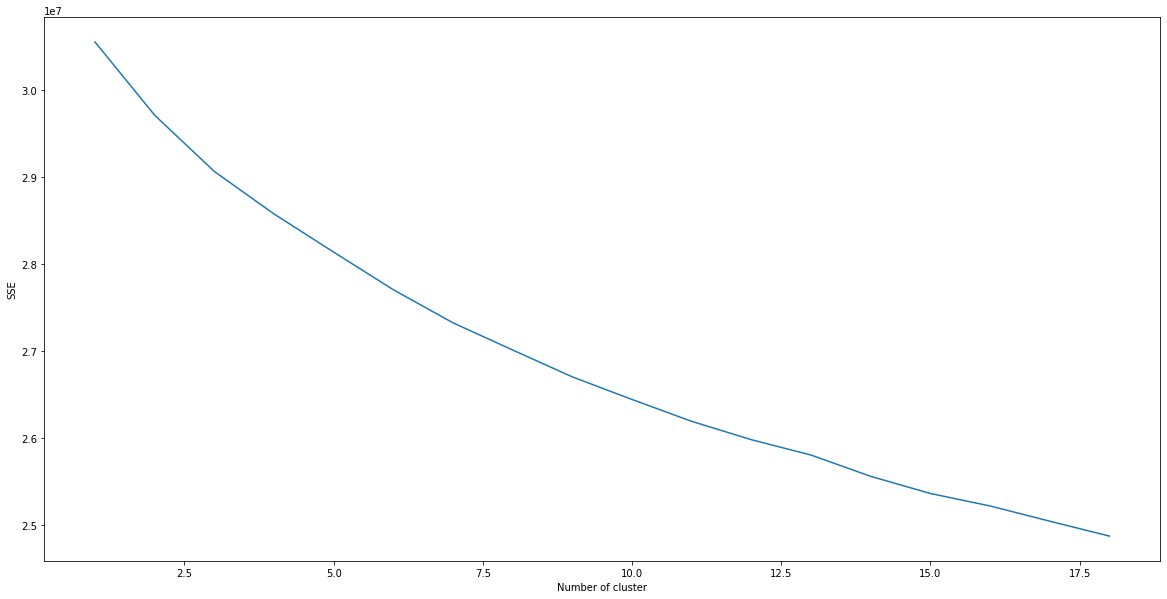

19 :  24764707.04194954 



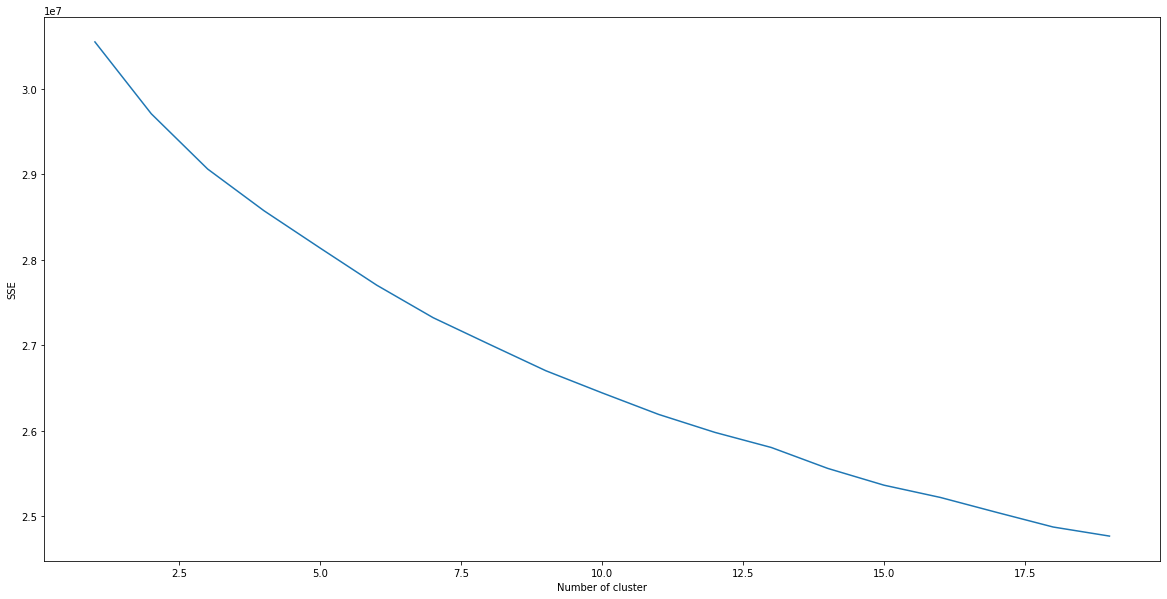

20 :  24571421.898506008 



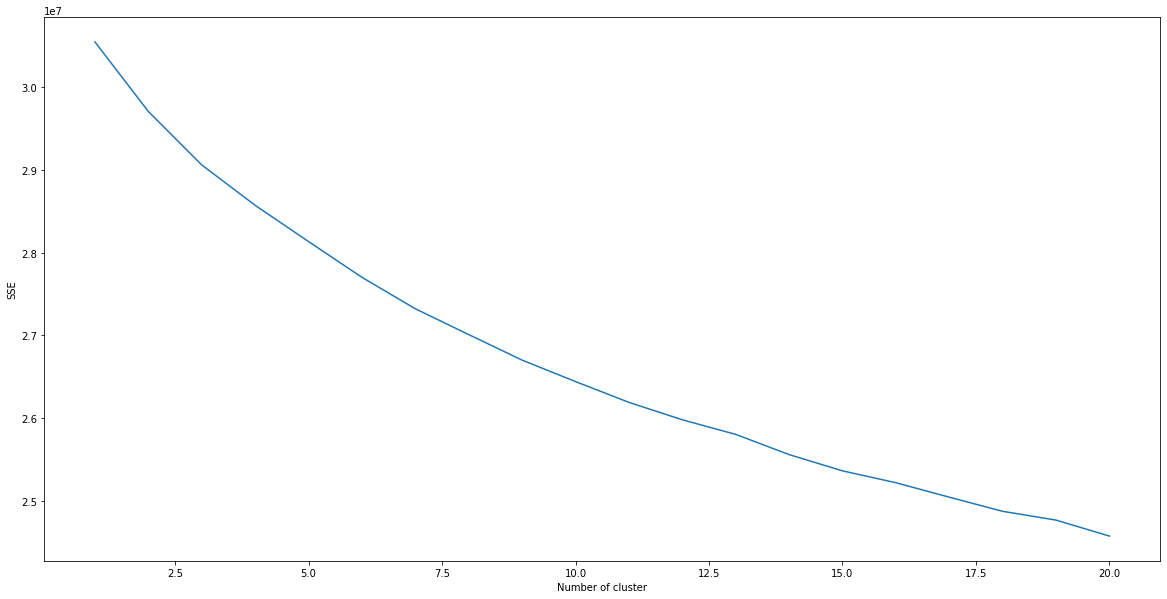

21 :  24448816.599171687 



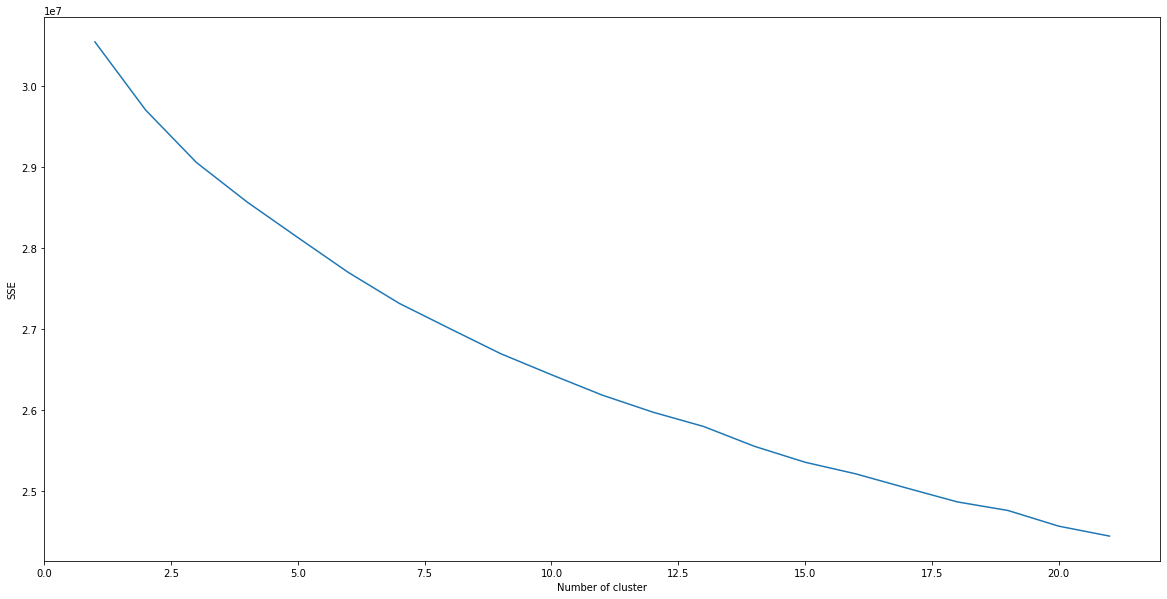

22 :  24397811.772284064 



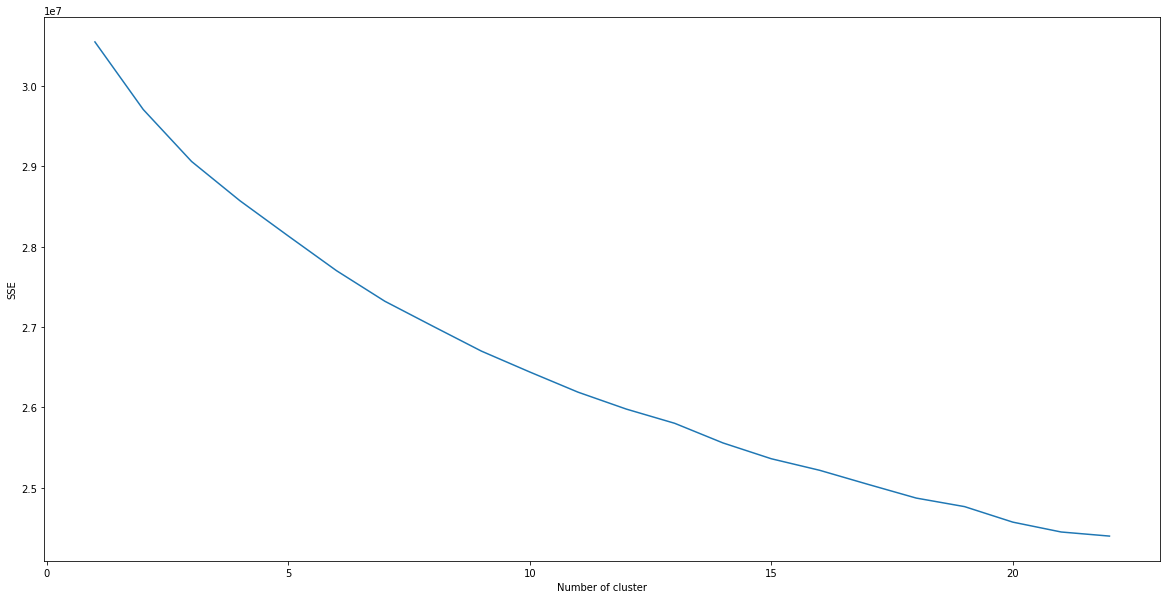

23 :  24244342.741140317 



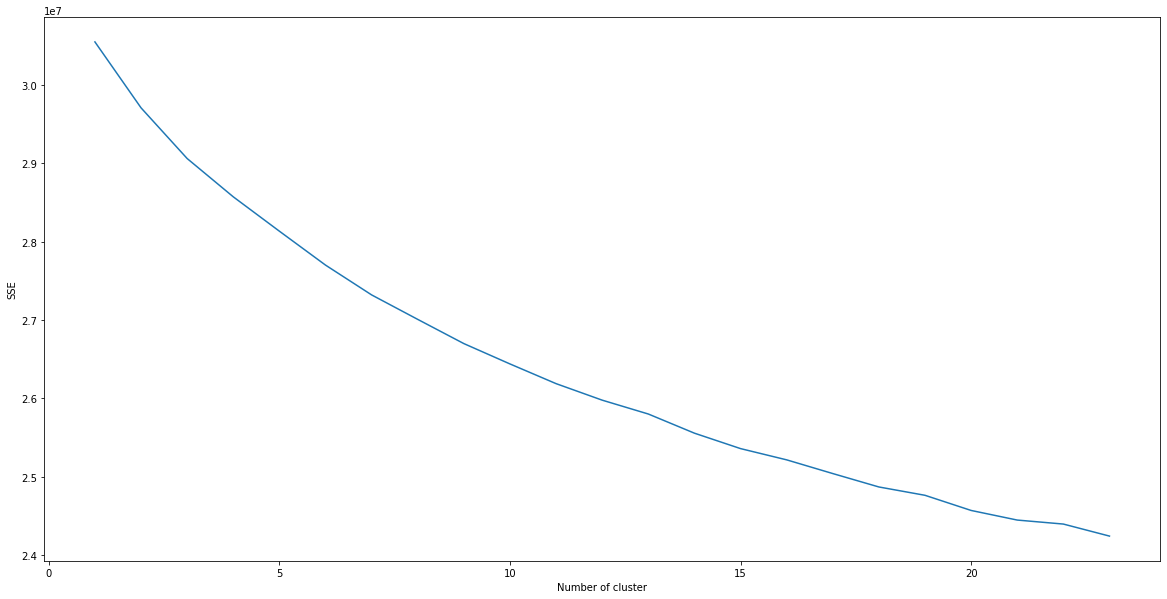

24 :  24108201.69158833 



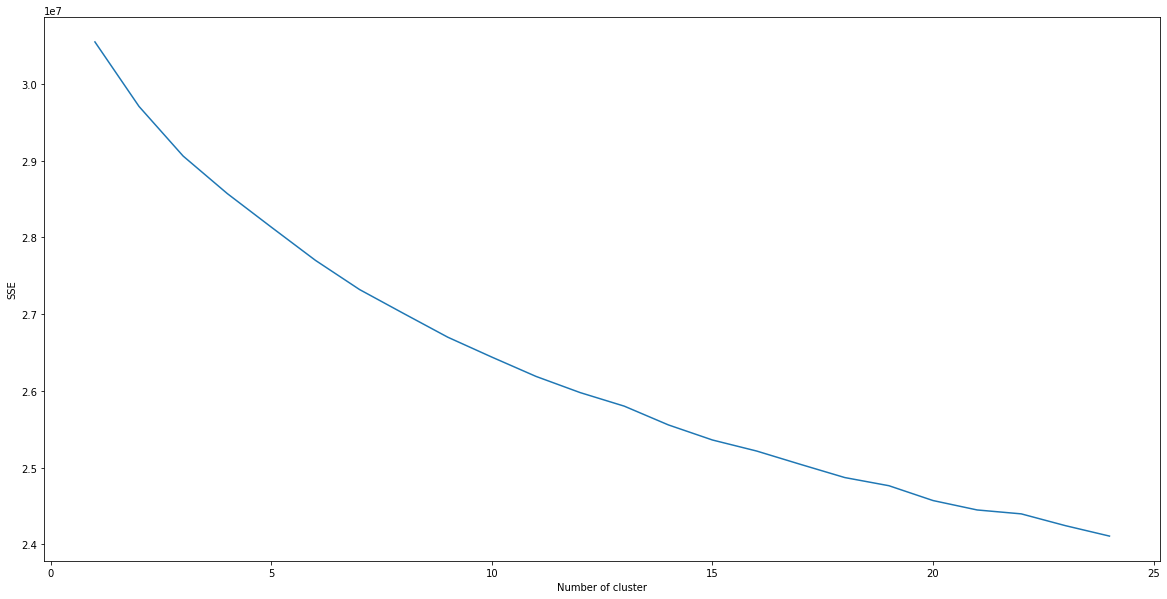

25 :  24062511.966360107 



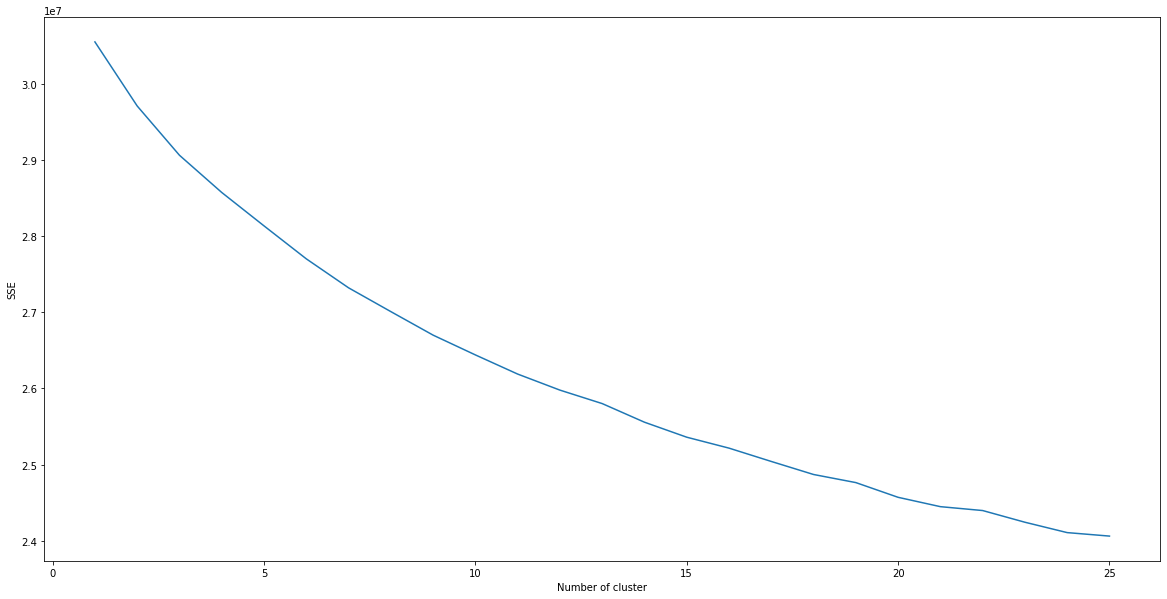

26 :  23869378.275598526 



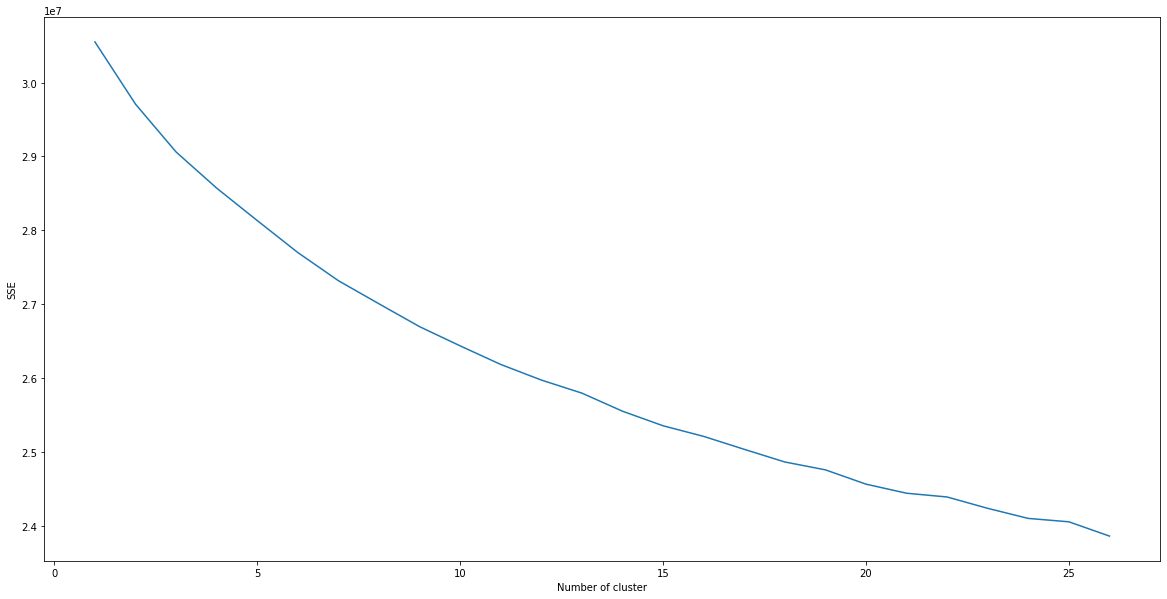

27 :  23809892.0478903 



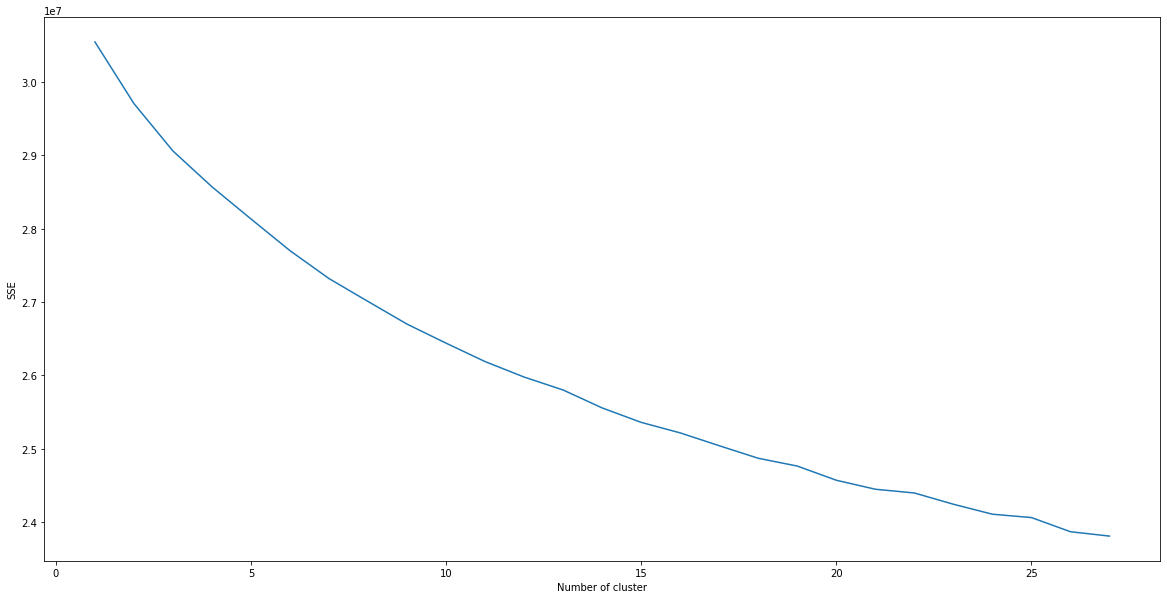

28 :  23682839.32405362 



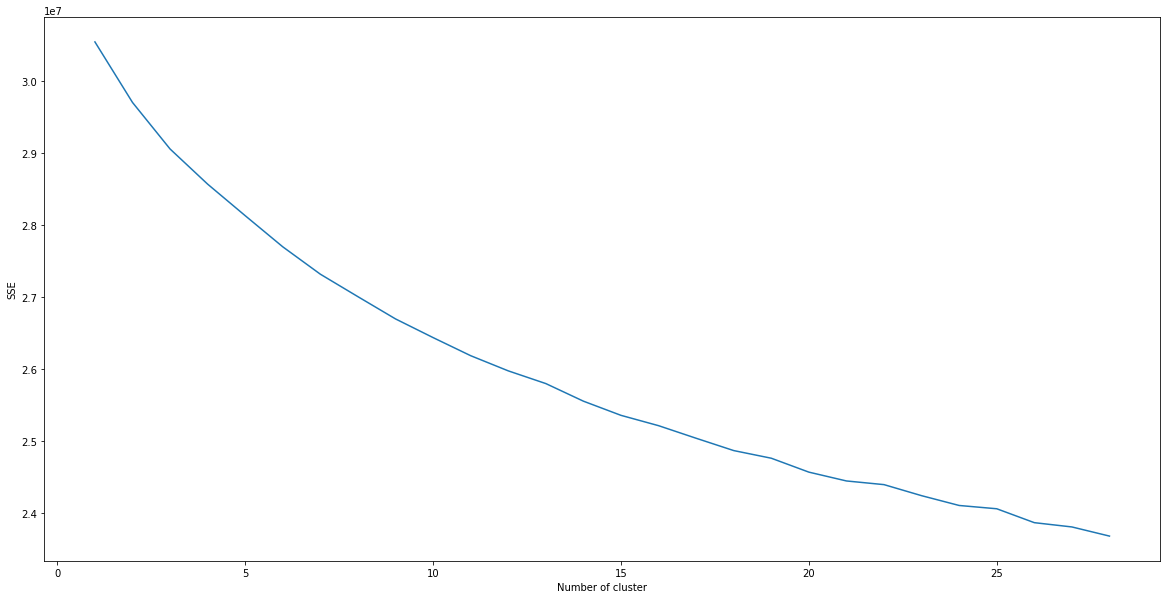

29 :  23605229.86280713 



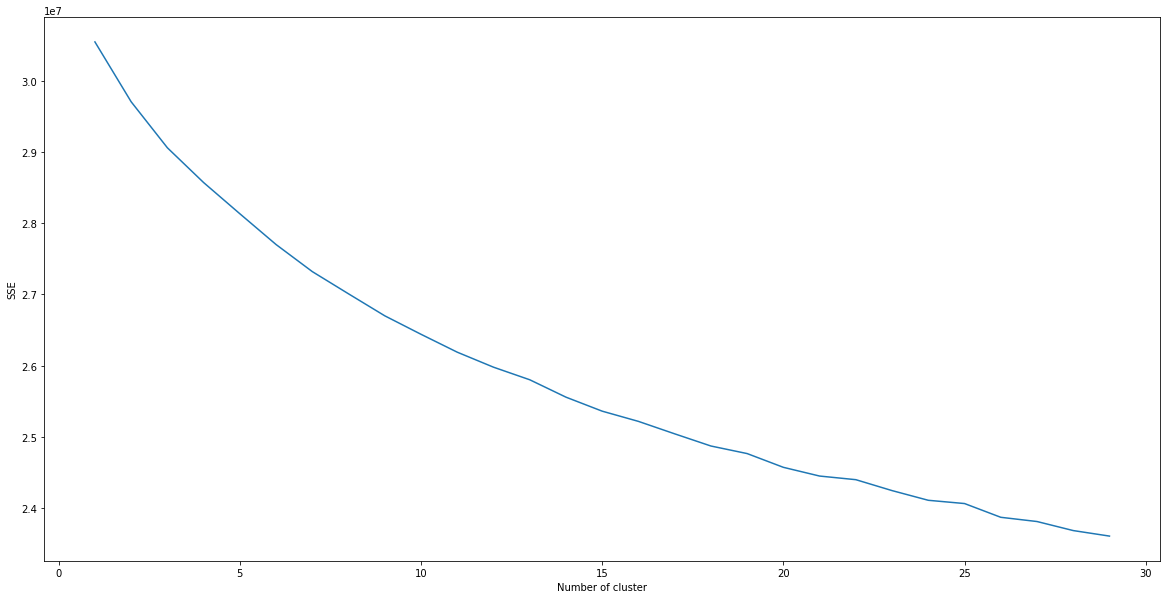

In [0]:
sse = {}
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(my_df)
    my_df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print (k, ": ", sse[k], "\n")
    plt.rcParams['figure.figsize'] = [20.0, 10.0]
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()

In [0]:
sse

{1: 30548757.99846102,
 2: 29707570.386112597,
 3: 29060895.323652122,
 4: 28572440.683379244,
 5: 28132699.24878676,
 6: 27700050.773739662,
 7: 27318150.153646234,
 8: 26985367.99394097,
 9: 26726856.215751853,
 10: 26445237.140056305,
 11: 26194167.25765935,
 12: 25948037.1644845,
 13: 25705148.707616284,
 14: 25488455.67639229,
 15: 25344554.211285662,
 16: 25183698.556484044,
 17: 25017480.542883277,
 18: 24897430.86579862,
 19: 24749399.908119667,
 20: 24584002.278267097,
 21: 24457810.14107678,
 22: 24269835.827159006,
 23: 24189532.652593847,
 24: 24108185.643408947,
 25: 24009659.929283448,
 26: 23836407.63106445,
 27: 23785466.723777503,
 28: 23684942.199280098,
 29: 23621531.96498311}

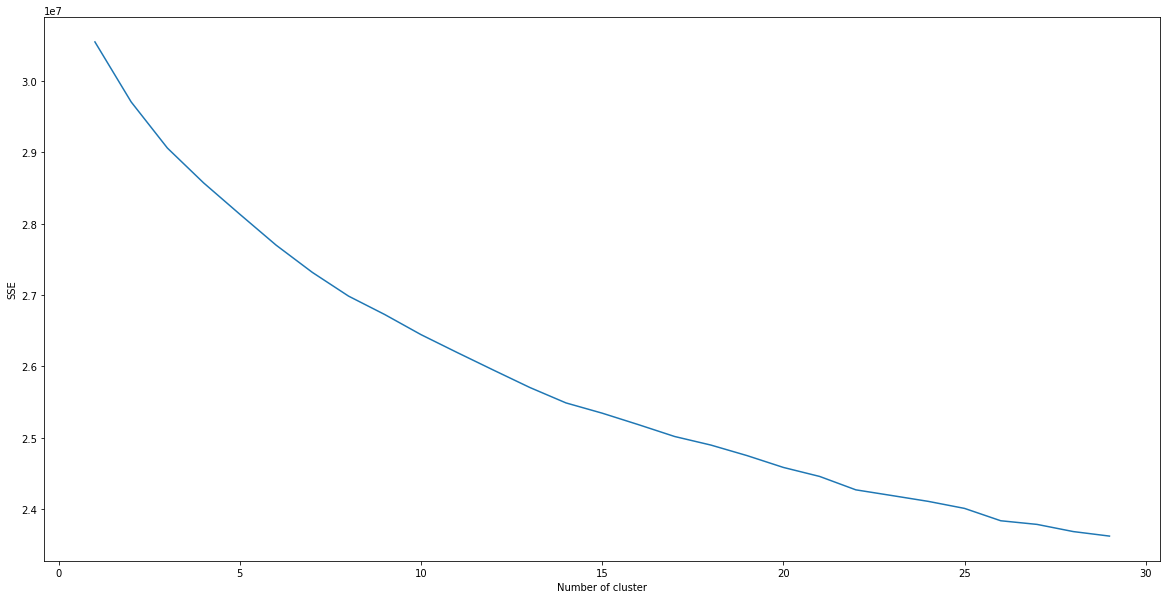

In [0]:
  plt.rcParams['figure.figsize'] = [20.0, 10.0]
  plt.figure()
  plt.plot(list(sse.keys()), list(sse.values()))
  plt.xlabel("Number of cluster")
  plt.ylabel("SSE")
  plt.show()

In [0]:
kmeans = KMeans(n_clusters=14, algorithm = 'auto')
kmeans.fit (my_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=26, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
predict = pd.DataFrame (kmeans.predict(my_df), columns = ['cluster'])
predict ['game_id'] = my_df.index
predict

,cluster,game_id
0,24,10
1,1,20
2,24,30
3,1,40
4,1,50
...,...,...
3393,8,1147510
3394,11,1148650
3395,8,1149660
3396,9,1162520


In [0]:
predict.to_csv("/content/drive/My Drive/Colab Notebooks/data/game_cluster.csv", encoding = 'utf-8', index = True)

In [0]:
indie = predict.copy()
indie.index = indie['game_id']
indie = pd.concat ([indie, df], axis = 1 )
pd.set_option('display.max_columns', None)
indie = indie.groupby ('cluster').mean()

In [0]:
indie

,game_id,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,3D,3D Fighter,3D Platformer,3D Vision,4 Player Local,4X,6DOF,ATV,Abstract,Action,Action RPG,Action-Adventure,Addictive,Adventure,Agriculture,Aliens,Alternate History,America,Animation & Modeling,Anime,Arcade,Archery,Arena Shooter,Artificial Intelligence,Assassin,Asymmetric VR,Asynchronous Multiplayer,Atmospheric,Audio Production,Automation,Automobile Sim,BMX,Base Building,Baseball,Based On A Novel,Basketball,Batman,Battle Royale,Beat 'em up,Beautiful,Benchmark,Bikes,Blood,Board Game,Bowling,Boxing,Building,Bullet Hell,Bullet Time,CRPG,Capitalism,Card Game,Cartoon,Cartoony,Casual,Cats,Character Action Game,Character Customization,Chess,Choices Matter,Choose Your Own Adventure,Cinematic,City Builder,Class-Based,Classic,Clicker,Co-op,Co-op Campaign,Cold War,Collectathon,Colorful,Combat,Combat Racing,Comedy,Comic Book,Competitive,Conspiracy,Controller,Conversation,Crafting,Crime,Crowdfunded,Cult Classic,Cute,Cyberpunk,Cycling,Dark,Dark Comedy,Dark Fantasy,Dark Humor,Dating Sim,Demons,Design & Illustration,Destruction,Detective,Difficult,Dinosaurs,Diplomacy,Documentary,Dog,Dragons,Drama,Driving,Dungeon Crawler,Dungeons & Dragons,Dynamic Narration,Dystopian,Early Access,Economy,Education,Emotional,Epic,Episodic,Experience,Experimental,Exploration,FMV,FPS,Faith,Family Friendly,Fantasy,Fast-Paced,Female Protagonist,Fighting,First-Person,Fishing,Flight,Football,Foreign,Free to Play,Funny,Futuristic,Gambling,Game Development,GameMaker,Games Workshop,Gaming,God Game,Golf,Gore,Gothic,Grand Strategy,Great Soundtrack,Grid-Based Movement,Gun Customization,Hack and Slash,Hacking,Hand-drawn,Hardware,Heist,Hentai,Hex Grid,Hidden Object,Historical,Horror,Horses,Hunting,Illuminati,Immersive Sim,Indie,Intentionally Awkward Controls,Interactive Fiction,Inventory Management,Investigation,Isometric,JRPG,Jet,Kickstarter,LEGO,LGBTQ+,Lara Croft,Lemmings,Level Editor,Life Sim,Linear,Local Co-Op,Local Multiplayer,Logic,Loot,Lore-Rich,Lovecraftian,MMORPG,MOBA,Magic,Management,Mars,Martial Arts,Massively Multiplayer,Masterpiece,Match 3,Mature,Mechs,Medical Sim,Medieval,Memes,Metroidvania,Military,Mini Golf,Minigames,Minimalist,Mining,Mod,Moddable,Modern,Motocross,Motorbike,Mouse only,Movie,Multiplayer,Multiple Endings,Music,Music-Based Procedural Generation,Mystery,Mystery Dungeon,Mythology,NSFW,Narration,Nature,Naval,Naval Combat,Ninja,Noir,Nonlinear,Nudity,Offroad,Old School,On-Rails Shooter,Online Co-Op,Open World,Otome,Outbreak Sim,Parkour,Parody,Party-Based RPG,Perma Death,Philosophical,Physics,Pinball,Pirates,Pixel Graphics,Platformer,Point & Click,Political,Politics,Pool,Post-apocalyptic,Precision Platformer,Procedural Generation,Programming,Psychedelic,Psychological,Psychological Horror,Puzzle,Puzzle Platformer,PvE,PvP,Quick-Time Events,RPG,RPGMaker,RTS,Racing,Real Time Tactics,Real-Time,Real-Time with Pause,Realistic,Relaxing,Remake,Replay Value,Resource Management,Retro,Rhythm,Robots,Roguelike,Roguelite,Roguevania,Romance,Rome,Runner,Sailing,Sandbox,Satire,Sci-fi,Science,Score Attack,Sequel,Sexual Content,Shoot 'Em Up,Shooter,Short,Side Scroller,Silent Protagonist,Simulation,Singleplayer,Skateboarding,Skating,Skiing,Sniper,Snow,Snowboarding,Soccer,Social Deduction,Software,Software Training,Sokoban,Solitaire,Souls-like,Soundtrack,Space,Space Sim,Spectacle fighter,Split Screen,Sports,Star Wars,Stealth,Steam Machine,Steampunk,Story Rich,Strategy,Strategy RPG,Stylized,Submarine,Superhero,Supernatural,Surreal,Survival,Survival Horror,Swordplay,Tabletop,Tactical,Tactical RPG,Tanks,Team-Based,Tennis,Text-Based,Third Person,Third-Person Shooter,Thriller,Time Attack,Time Management,Time Manipulation,Time Travel,Top-Down,Top-Down Shooter,Touch-Friendly,Tower Defense,TrackIR,Trading,Trading Card Game,Trains,Transhumanism,Transportation,Trivia,Turn-Based,Turn-Based Combat,Turn-Based Strategy,Turn-Based Tactics,Tutorial,Twin Stick Shooter,Typing,Underground,Underwater,Unforgiving,Utilities,VR,Vampire,Vehi

In [0]:
result = pd.DataFrame()
for i in range(0, 14):
    a = indie.iloc[i].sort_values(ascending=False)
    a = a.drop('game_id')
    a = a.to_frame()
    a = a.reset_index()
    a.rename(columns = {'index':'tag', 0:'cluster '+str(i)}, inplace = True)
    result = pd.concat([result, a], axis = 1, sort = True)

In [0]:
pd.set_option('display.max_rows', None)
result

,tag,cluster 0,tag,1,tag,2,tag,3,tag,4,tag,5,tag,6,tag,7,tag,8,tag,9,tag,10,tag,11,tag,12,tag,13
0,Indie,0.993056,Action,0.968,Simulation,0.979592,Turn-Based,0.971292,Singleplayer,0.850340,Strategy,0.946188,Open World,0.930108,Platformer,0.921708,Indie,0.694394,Anime,0.902174,Singleplayer,0.923977,Horror,0.978378,Action,0.996516,Action,0.942857
1,Roguelike,0.930556,Multiplayer,0.896,Strategy,0.959184,Singleplayer,0.846890,Simulation,0.843537,Singleplayer,0.780269,Sandbox,0.897849,Singleplayer,0.893238,Singleplayer,0.660036,Nudity,0.760870,Adventure,0.883041,Action,0.854054,FPS,0.975610,Singleplayer,0.898701
2,Roguelite,0.840278,Massively Multiplayer,0.736,Singleplayer,0.918367,Strategy,0.842105,Multiplayer,0.823129,Multiplayer,0.744395,Adventure,0.881720,Action,0.893238,Action,0.627486,Sexual Content,0.722826,Indie,0.818713,Singleplayer,0.789189,Shooter,0.891986,Adventure,0.867532
3,Singleplayer,0.798611,FPS,0.648,Management,0.877551,RPG,0.751196,Driving,0.755102,Action,0.659193,Indie,0.854839,Indie,0.857651,Casual,0.464738,Singleplayer,0.679348,Story Rich,0.739766,Survival Horror,0.762162,First-Person,0.846690,RPG,0.688312
4,Action,0.736111,Shooter,0.640,Sandbox,0.727891,Turn-Based Strategy,0.626794,Racing,0.666667,War,0.627803,Survival,0.838710,2D,0.814947,Multiplayer,0.426763,Indie,0.668478,Atmospheric,0.704678,Adventure,0.735135,Singleplayer,0.790941,Third Person,0.636364
5,RPG,0.638889,Co-op,0.632,Building,0.659864,Fantasy,0.531100,Open World,0.666667,RTS,0.582960,Action,0.768817,Adventure,0.754448,Great Soundtrack,0.381555,Visual Novel,0.646739,Puzzle,0.675439,Atmospheric,0.708108,Multiplayer,0.700348,Atmospheric,0.592208
6,Adventure,0.631944,First-Person,0.536,Indie,0.639456,Adventure,0.516746,Realistic,0.544218,Simulation,0.578475,Multiplayer,0.768817,Great Soundtrack,0.711744,Simulation,0.363472,Adventure,0.646739,Great Soundtrack,0.663743,Survival,0.637838,Adventure,0.536585,Open World,0.548052
7,2D,0.604167,PvP,0.528,City Builder,0.571429,Indie,0.492823,Action,0.537415,Tactical,0.515695,Singleplayer,0.763441,Side Scroller,0.512456,Funny,0.338156,Cute,0.543478,Point & Click,0.502924,Gore,0.627027,Sci-fi,0.505226,Story Rich,0.545455
8,Difficult,0.590278,Indie,0.528,Economy,0.544218,Tactical,0.440191,Sports,0.401361,Historical,0.502242,Crafting,0.747312,Difficult,0.505338,Strategy,0.314647,Mature,0.527174,Casual,0.438596,Indie,0.589189,Atmospheric,0.473868,Great Soundtrack,0.516883
9,Great Soundtrack,0.472222,Open World,0.520,Resource Management,0.462585,Multiplayer,0.406699,Indie,0.401361,Military,0.461883,Early Access,0.704301,Pixel Graphics,0.384342,2D,0.278481,Casual,0.521739,2D,0.380117,First-Person,0.583784,Co-op,0.456446,Fantasy,0.506494


In [0]:
result.to_csv('/content/drive/My Drive/Colab Notebooks/tag_cluster.csv', encoding='utf-8')

In [0]:
count_cluster = predict.groupby(by ='cluster', axis = 0).count().rename(columns = {'game_id' :'game_count'})

In [0]:
count_cluster

,game_count
cluster,
0,129
1,138
2,170
3,201
4,299
5,134
6,136
7,146
8,92
